In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [4]:
dataset=pd.read_csv("spam.csv",sep=",",encoding = "latin")
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [13]:
dataset=dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
dataset = dataset.rename(columns = {'v1':'y','v2':'X'})
dataset.groupby('y').describe()

X                                                               
     count unique                                                top freq
y                                                                        
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['y'] = encoder.fit_transform(dataset['y'])
dataset.head()

,y,X
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
x_copy = dataset['X'].copy() 
y=dataset['y']

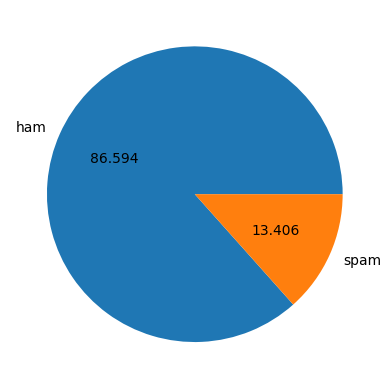

In [16]:
plt.pie(dataset['y'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

### removing punctuations and stopwords

In [17]:
import string
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [18]:
x_copy = x_copy.apply(text_preprocess)
x_copy.head()

0    Go jurong point crazy Available bugis n great ...
1                              Ok lar Joking wif u oni
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3                  U dun say early hor U c already say
4          Nah dont think goes usf lives around though
Name: X, dtype: object

### TFIDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
msg_vect = vectorizer.fit_transform(x_copy)
print(" after vectorizer")
print(msg_vect[0])

 after vectorizer
  (0, 8871)	0.19696340342726038
  (0, 1168)	0.3454453072521403
  (0, 3821)	0.16228382867264401
  (0, 2198)	0.2918335915067389
  (0, 1862)	0.3297648855969494
  (0, 4809)	0.2918335915067389
  (0, 9107)	0.23822187576133733
  (0, 3861)	0.19227005405586492
  (0, 1864)	0.2918335915067389
  (0, 1401)	0.2626832171423389
  (0, 2482)	0.26752361109476797
  (0, 6381)	0.2701917502132373
  (0, 4652)	0.3454453072521403
  (0, 3764)	0.15705625796538664


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(msg_vect, y, test_size=0.3, random_state=20)


In [21]:
print("x_train", X_train[:5])
print("y_train" ,y_train[:5])

x_train   (0, 8938)	0.38390752553068686
  (0, 4051)	0.38390752553068686
  (0, 3122)	0.2672880653818529
  (0, 3624)	0.29420398711192614
  (0, 8827)	0.284983697343027
  (0, 5560)	0.31455334019386855
  (0, 4632)	0.3609090451930311
  (0, 3901)	0.25635010015080717
  (0, 2622)	0.19713700659748826
  (0, 5531)	0.23839040775858125
  (0, 7996)	0.27460502097424444
  (1, 321)	0.26494347155899756
  (1, 764)	0.26494347155899756
  (1, 8802)	0.26494347155899756
  (1, 618)	0.26494347155899756
  (1, 879)	0.26494347155899756
  (1, 5039)	0.26494347155899756
  (1, 2175)	0.26494347155899756
  (1, 2248)	0.252917181834926
  (1, 5048)	0.2277859206047139
  (1, 4868)	0.21437982488795423
  (1, 6734)	0.2238253154062689
  (1, 1752)	0.17921365788176138
  (1, 6358)	0.18179445708751832
  (1, 2104)	0.16830676440049086
  :	:
  (3, 1239)	0.29774380259876354
  (3, 2335)	0.29774380259876354
  (3, 1745)	0.29774380259876354
  (3, 4101)	0.29774380259876354
  (3, 1093)	0.29774380259876354
  (3, 3691)	0.29774380259876354
  (3, 

### logistic 

In [22]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='liblinear', penalty='l1')
logistic.fit(X_train, y_train)
log_pred = logistic.predict(X_test)
log_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
acc1=accuracy_score(y_test,log_pred)
acc1

0.9383971291866029

### stemming

In [24]:

def stemmer (text):
    text = text.split()
    words = " "
    for i in text:
        stemmer = SnowballStemmer("english")
        words += (stemmer.stem(i))+" "
    return words

In [25]:
x_copy = x_copy.apply(stemmer)
print(x_copy.head())
vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(x_copy)


0     go jurong point crazi avail bugi n great worl...
1                               ok lar joke wif u oni 
2     free entri 2 wkli comp win fa cup final tkts ...
3                 u dun say earli hor u c alreadi say 
4           nah dont think goe usf live around though 
Name: X, dtype: object


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_vect,y, test_size=0.3, random_state=20)
log2 = LogisticRegression()
log2.fit(X_train, y_train)
log2_pred = log2.predict(X_test)
log2_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
#accuracy after aplying stemmer
acc2=accuracy_score(y_test,log2_pred)
acc2


0.94377990430622

 ## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc=accuracy_score(y_test,rfc_pred)
print("Accuracy 1:", rfc_acc)

Accuracy 1: 0.9671052631578947


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred))
print(f1_score(y_test,rfc_pred))
print(recall_score(y_test,rfc_pred))

0.9671052631578947
[[1439    0]
 [  55  178]]
1.0
0.8661800486618005
0.7639484978540773


 ### Exploring various  algorithms

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.3, random_state=20)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaB': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [32]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    return accuracy,precision,recall

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

accuracy_scores = []
precision_scores = []
recall_scores=[]
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall - ",current_recall)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)

For  SVC
Accuracy -  0.9736842105263158
Precision -  0.9796954314720813
recall -  0.8283261802575107
For  KN
Accuracy -  0.8917464114832536
Precision -  1.0
recall -  0.22317596566523606
For  NB
Accuracy -  0.9551435406698564
Precision -  1.0
recall -  0.6781115879828327
For  DT
Accuracy -  0.9342105263157895
Precision -  0.863905325443787
recall -  0.6266094420600858
For  LR
Accuracy -  0.9461722488038278
Precision -  0.9132947976878613
recall -  0.6781115879828327
For  RF
Accuracy -  0.9659090909090909
Precision -  0.9731182795698925
recall -  0.776824034334764
For  AdaB
Accuracy -  0.9611244019138756
Precision -  0.92
recall -  0.7896995708154506
For  BgC
Accuracy -  0.9605263157894737
Precision -  0.8883720930232558
recall -  0.8197424892703863
For  ETC
Accuracy -  0.9712918660287081
Precision -  0.9946524064171123
recall -  0.7982832618025751
For  GBDT
Accuracy -  0.9473684210526315
Precision -  0.9142857142857143
recall -  0.6866952789699571
For  xgb
Accuracy -  0.967105263157894

In [34]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall
0,SVC,0.973684,0.979695,0.828326
8,ETC,0.971292,0.994652,0.798283
10,xgb,0.967105,0.927885,0.828326
5,RF,0.965909,0.973118,0.776824
6,AdaB,0.961124,0.920000,0.789700
7,BgC,0.960526,0.888372,0.819742
2,NB,0.955144,1.000000,0.678112
9,GBDT,0.947368,0.914286,0.686695
4,LR,0.946172,0.913295,0.678112
3,DT,0.934211,0.863905,0.626609


In [35]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.973684
1,ETC,Accuracy,0.971292
2,xgb,Accuracy,0.967105
3,RF,Accuracy,0.965909
4,AdaB,Accuracy,0.961124
5,BgC,Accuracy,0.960526
6,NB,Accuracy,0.955144
7,GBDT,Accuracy,0.947368
8,LR,Accuracy,0.946172
9,DT,Accuracy,0.934211


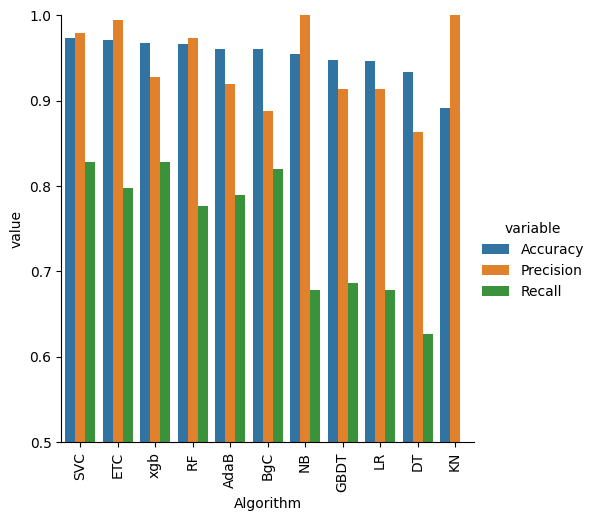

In [36]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### storing the model

In [37]:
import pickle
pickle.dump(svc,open('svc.pkl','wb'))
pickle.dump(vectorizer,open('vector1.pkl','wb'))


In [38]:
modelv = pickle.load(open('vector1.pkl','rb'))
modelv.transform(x_copy)

<5572x8037 sparse matrix of type '<class 'numpy.float64'>'
	with 46982 stored elements in Compressed Sparse Row format>

### Checking for new inputs

In [39]:
# inp=["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize"]
def is_spam(inpx):
#     print(inpx)
    inp=pd.Series(inpx)
#     print("series",inp)
    inp =inp.apply(stemmer)
#     print("stemmer",inp)
    inp_prep=inp.apply(text_preprocess)
#     print("prepppp",inp_prep)

    inp_test=modelv.transform(inp_prep)
#     print("inp_test",inp_test)
    inp_pred=svc.predict(inp_test)
    print("op",inp_pred)

    if inp_pred==1:
        print(inpx,"\nThe above message is spam")
        return True
    else:
        print(inpx, "\nThe above message is Not Spam")

        return False


# model.predict(vectorizer.transform(inp)[0])



In [40]:
inp1 = "Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have prize!"  
is_spam(inp1)

op [1]
Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have prize! 
The above message is spam


True

In [41]:
#checking for new input text

is_spam(" hi my name jack sparrow")

op [0]
 hi my name jack sparrow 
The above message is Not Spam


False

In [42]:
is_spam("hello you have won cash back of 5000 click the link to get prize!!!!")

op [1]
hello you have won cash back of 5000 click the link to get prize!!!! 
The above message is spam


True